In [1]:
import typing as tp
from matplotlib import pyplot as plt

import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse; rmse = lambda *x: mse(*x)**0.5
from tqdm.notebook import tqdm

from custome import DataFrameHandler, CrossValSampler, get_Xy, BLinearRegression

In [2]:
# Global const.
TRAIN_TO_ALL_DATA_RATION = 8 / 10
DROP_COLUMNS = ['sex', 'smoker', 'region']
CHECK_COLUMNS = ['female', 'male', 'southwest', 'southeast', 'northwest', 'northeast']
STATISTICS_COUNT_COLUMNS = [
    'age', 'bmi', 'children', 'charges', 'female', 'male', 'northeast', 'northwest', 'southeast', 'southwest'
]

In [5]:
data_handler = DataFrameHandler()

# Load all data and shuffle it.
df = pd.read_csv('data/insurance.csv')
df = df.sample(df.shape[0], random_state=7).reset_index(drop=True)

train_len = round(df.shape[0] * TRAIN_TO_ALL_DATA_RATION)

# Devide all data to train/test parts.
train_df = df.iloc[:train_len]
test_df = df.iloc[train_len:]

# Prepare data.
train_df = data_handler.prepare_dataset(train_df, DROP_COLUMNS, CHECK_COLUMNS)
train_statistics = data_handler.count_statistics(train_df, STATISTICS_COUNT_COLUMNS)
train_df = data_handler.normalize_dataset(train_df, train_statistics)

test_df = data_handler.prepare_dataset(test_df, DROP_COLUMNS, CHECK_COLUMNS)
test_df = data_handler.normalize_dataset(test_df, train_statistics)

In [6]:
X, y = get_Xy(train_df, target_name="charges")

In [7]:
train_val_sampler = CrossValSampler(X, y, val_size=75)

In [8]:
history = []
for train, val in tqdm(train_val_sampler, total=train_val_sampler.folds_num):
    X_train, y_train = train
    X_val, y_val = val
    model = BLinearRegression(5000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = rmse(y_val, y_pred)
    history.append(score)

  0%|          | 0/14 [00:00<?, ?it/s]

/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 520 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 487 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 475 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 497 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 478 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 466 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 470 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 503 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 442 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 500 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 505 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 489 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 467 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 464 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [22]:
import json

with open('data/history_classic.json', 'r') as f:
    history_classic = json.load(f)

mean RMSE of baysian model: 0.944798


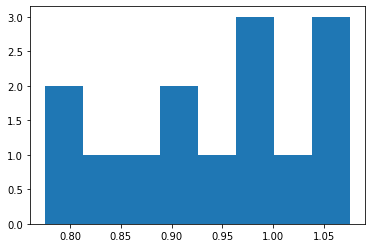

In [23]:
plt.hist(history, bins=8)
print('mean RMSE of baysian model: %4f' % np.mean(history))

In [24]:
import scipy 

print(scipy.stats.ttest_rel(history, history_classic), end='\n\n')
print('{:.4}% scores of bayesian model less than classic one!'.format(
        100 * np.mean([history[i] < history_classic[i] for i in range(14)])
    ))

Ttest_relResult(statistic=-1.418236922734866, pvalue=0.17964646337872503)

71.43% scores of bayesian model less than classic one!


In [26]:
train_val_sampler = CrossValSampler(X, y, val_size=300)

train, val = train_val_sampler()
X_train, y_train = train
X_val, y_val = val

model = BLinearRegression(draws=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
rmse(y_val, y_pred)

/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 406 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


0.9338158057726054

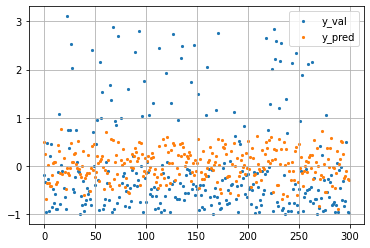

In [27]:
plt.scatter(range(len(y_val)), y_val, 4.5, label='y_val')
plt.scatter(range(len(y_val)), y_pred, 4.5, label='y_pred')
plt.legend()
plt.grid();

In [14]:
X_test, y_test = get_Xy(test_df, target_name="charges")

In [15]:
model = BLinearRegression(draws=5000)
model.fit(X, y)

/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 474 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [16]:
y_pred = model.predict(X_test)

In [17]:
rmse(y_test, y_pred)  # Current model (bayesian) score.

0.8819116248008672

In [18]:
with open('data/classic_y_test_prediction.json', 'r') as f:
    y_classic_pred = np.array(json.load(f))

In [19]:
rmse(y_test, y_classic_pred)  # Classic linear model (from sklearn) score.

0.8819350790631854

In [20]:
abs_diff_for_each = np.abs(y_test - y_pred)
abs_diff_for_each__classic = np.abs(y_test - y_classic_pred)

scipy.stats.ttest_rel(
    abs_diff_for_each,
    abs_diff_for_each__classic
)

Ttest_relResult(statistic=-0.8882690083112889, pvalue=0.3751955729942503)

In [21]:
print('{:.4}% scores of bayesian model less than classic one!'.format(
    np.mean(abs_diff_for_each < abs_diff_for_each__classic) * 100
))

55.97% scores of bayesian model less than classic one!
